In [12]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import datetime as dt
%matplotlib inline

# Download Stock data from Googlesheet as CSV files using GoogleFinance:
Boeing,
McDonald's,
JP Morgan,
Nvidia,
Pfizer,
Shake Shack

In [135]:
# Set relative file paths
ba_data = Path("ba_10yrs.csv")
mcd_data = Path("mcd_10yrs.csv")
jpm_data = Path("jpm_10yrs.csv")
nvda_data = Path("nvda_10yrs.csv")
pfe_data = Path("pfe_10yrs.csv")
nflx_data = Path("nflx_10yrs.csv")
sp500_data = Path("sp500_10yrs.csv")

## Data Cleanning

In [136]:
## Data cleaning
# Read CSVs as Pandas DataFrames
ba_df = pd.read_csv(ba_data)
mcd_df = pd.read_csv(mcd_data)
jpm_df = pd.read_csv(jpm_data)
nvda_df = pd.read_csv(nvda_data)
pfe_df = pd.read_csv(pfe_data)
nflx_df = pd.read_csv(nflx_data)
sp500_df = pd.read_csv(sp500_data)

In [137]:
# Display a few rows to see if the file is read correctly
pfe_df.head()

,Date,Close
0,1/4/2010,18.93
1,1/5/2010,18.66
2,1/6/2010,18.60
3,1/7/2010,18.53
4,1/8/2010,18.68


In [138]:
# Set the "Data" column as a datetime index to the DataFrame
ba_df = pd.read_csv(ba_data, index_col="Date")
mcd_df = pd.read_csv(mcd_data,index_col="Date")
jpm_df = pd.read_csv(jpm_data,index_col="Date")
nvda_df = pd.read_csv(nvda_data,index_col="Date")
pfe_df = pd.read_csv(pfe_data,index_col="Date")
nflx_df = pd.read_csv(nflx_data,index_col="Date")
sp500_df = pd.read_csv(sp500_data,index_col="Date")

In [139]:
# Display a few rows
ba_df.head()

,Close
Date,
1/4/2010,56.18
1/5/2010,58.02
1/6/2010,59.78
1/7/2010,62.20
1/8/2010,61.60


In [140]:
# Parse the dates
ba_df = pd.read_csv(ba_data, index_col="Date",infer_datetime_format=True, parse_dates=True)
mcd_df = pd.read_csv(mcd_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
jpm_df = pd.read_csv(jpm_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
nvda_df = pd.read_csv(nvda_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
pfe_df = pd.read_csv(pfe_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
nflx_df = pd.read_csv(nflx_data,index_col="Date",infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_data,index_col="Date",infer_datetime_format=True,parse_dates=True)

In [141]:
# Display a few rows
sp500_df

,Close
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.68
2010-01-08,1144.98
...,...
2020-05-11,2930.32
2020-05-12,2870.12
2020-05-13,2820.00


In [142]:
# Combine DataFrames into one portfolio (join = 'outer':union, no data loss)
portfolio_df = pd.concat([ba_df,mcd_df,jpm_df,nvda_df,pfe_df,nflx_df], axis="columns",join="outer")

# Sort datetime index in ascending order (past to present)
portfolio_df.sort_index (inplace=True)

In [143]:
portfolio_df.head(-10)

,Close,Close,Close,Close,Close,Close
Date,,,,,,
2010-01-04,56.18,62.78,42.85,18.49,18.93,7.64
2010-01-05,58.02,62.30,43.68,18.76,18.66,7.36
2010-01-06,59.78,61.45,43.92,18.88,18.60,7.62
2010-01-07,62.20,61.90,44.79,18.51,18.53,7.49
2010-01-08,61.60,61.84,44.68,18.55,18.68,7.61
...,...,...,...,...,...,...
2020-04-27,128.68,185.89,94.62,297.08,38.33,421.38
2020-04-28,131.30,185.93,95.29,291.36,37.91,403.83
2020-04-29,139.00,187.82,97.86,298.46,38.12,411.89


In [144]:
# Set column names to stock ticker names
portfolio_df.columns = ['BA','MCD','JPM','NVDA','PFE','NFLX']
portfolio_df.head(-10)

,BA,MCD,JPM,NVDA,PFE,NFLX
Date,,,,,,
2010-01-04,56.18,62.78,42.85,18.49,18.93,7.64
2010-01-05,58.02,62.30,43.68,18.76,18.66,7.36
2010-01-06,59.78,61.45,43.92,18.88,18.60,7.62
2010-01-07,62.20,61.90,44.79,18.51,18.53,7.49
2010-01-08,61.60,61.84,44.68,18.55,18.68,7.61
...,...,...,...,...,...,...
2020-04-27,128.68,185.89,94.62,297.08,38.33,421.38
2020-04-28,131.30,185.93,95.29,291.36,37.91,403.83
2020-04-29,139.00,187.82,97.86,298.46,38.12,411.89


In [89]:
# Check for nulls
portfolio_df.isnull().sum()

BA      0
MCD     0
JPM     0
NVDA    0
PFE     0
NFLX    0
dtype: int64

In [90]:
# Drop nulls
portfolio_df.dropna(inplace=True)

In [91]:
portfolio_df.isnull().sum()

BA      0
MCD     0
JPM     0
NVDA    0
PFE     0
NFLX    0
dtype: int64

## Portfolio Analysis

In [113]:
# Daily Returns
daily_returns = portfolio_df.pct_change()
daily_returns.head()

,BA,MCD,JPM,NVDA,PFE,NFLX
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032752,-0.007646,0.019370,0.014602,-0.014263,-0.036649
2010-01-06,0.030334,-0.013644,0.005495,0.006397,-0.003215,0.035326
2010-01-07,0.040482,0.007323,0.019809,-0.019597,-0.003763,-0.017060
2010-01-08,-0.009646,-0.000969,-0.002456,0.002161,0.008095,0.016021


In [114]:
# SP500 Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2010-01-04,NaN
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.003992
2010-01-08,0.002890


In [115]:
# Evaluate Riskness of Stocks - Annualized Volatility
volatility = daily_returns.std() * np.sqrt(252) #252 trading days
volatility

BA      0.327122
MCD     0.192452
JPM     0.282743
NVDA    0.424881
PFE     0.199720
NFLX    0.521004
dtype: float64

In [116]:
# Sort values
volatility.sort_values(inplace=True)
volatility

MCD     0.192452
PFE     0.199720
JPM     0.282743
BA      0.327122
NVDA    0.424881
NFLX    0.521004
dtype: float64

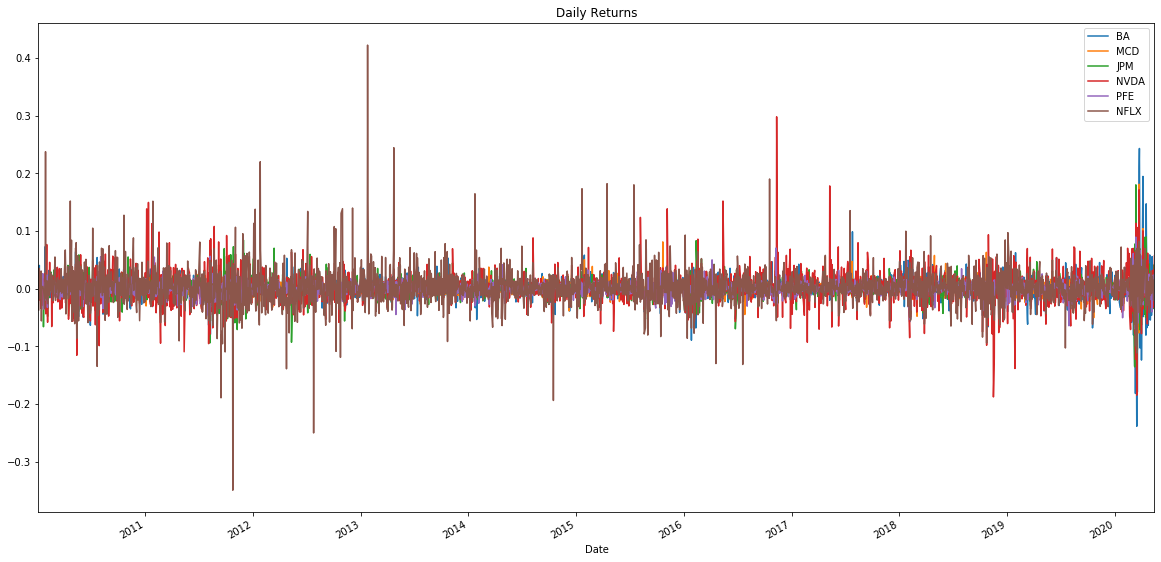

In [117]:
# Visualize returns in graph
daily_returns.plot(title="Daily Returns", figsize=[20,10])

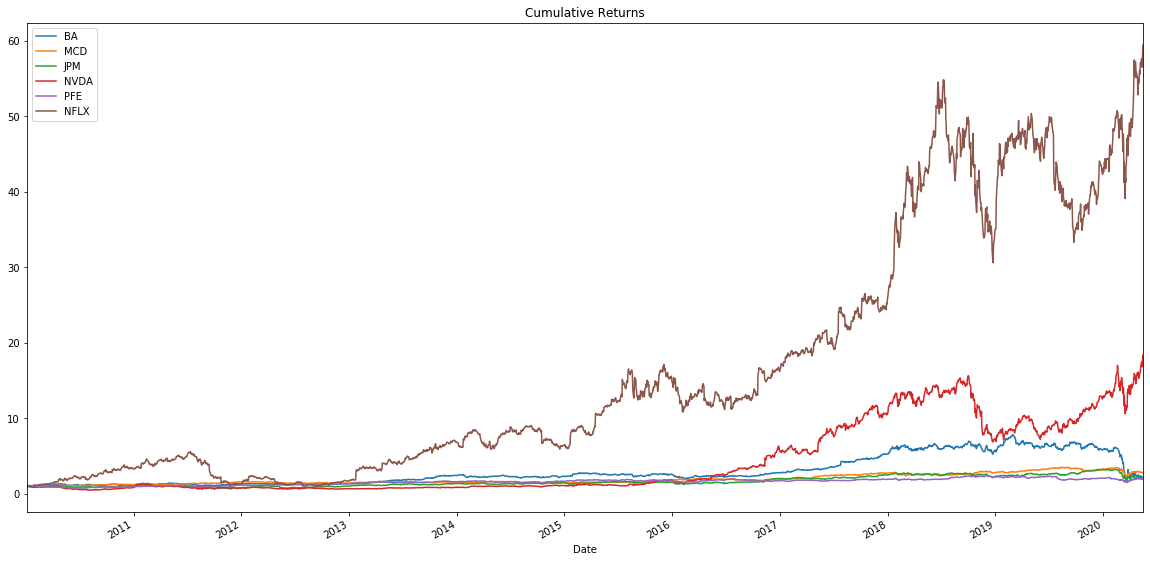

In [118]:
# Plot cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()
cumulative_returns.plot(title='Cumulative Returns',figsize=(20,10))

In [119]:
# Evaluate Correlation of Stock Returns
correlation = daily_returns.corr()
correlation

,BA,MCD,JPM,NVDA,PFE,NFLX
BA,1.000000,0.464091,0.563206,0.387486,0.398172,0.211558
MCD,0.464091,1.000000,0.461103,0.324951,0.387626,0.159200
JPM,0.563206,0.461103,1.000000,0.433592,0.498474,0.207315
NVDA,0.387486,0.324951,0.433592,1.000000,0.326825,0.292086
PFE,0.398172,0.387626,0.498474,0.326825,1.000000,0.193339
NFLX,0.211558,0.159200,0.207315,0.292086,0.193339,1.000000


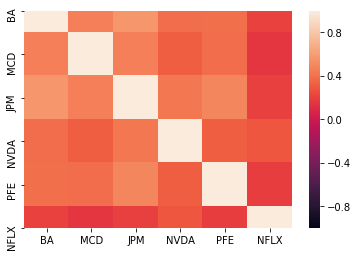

In [120]:
# Visualize correlation with a heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

# Rolling Statistics & Beta

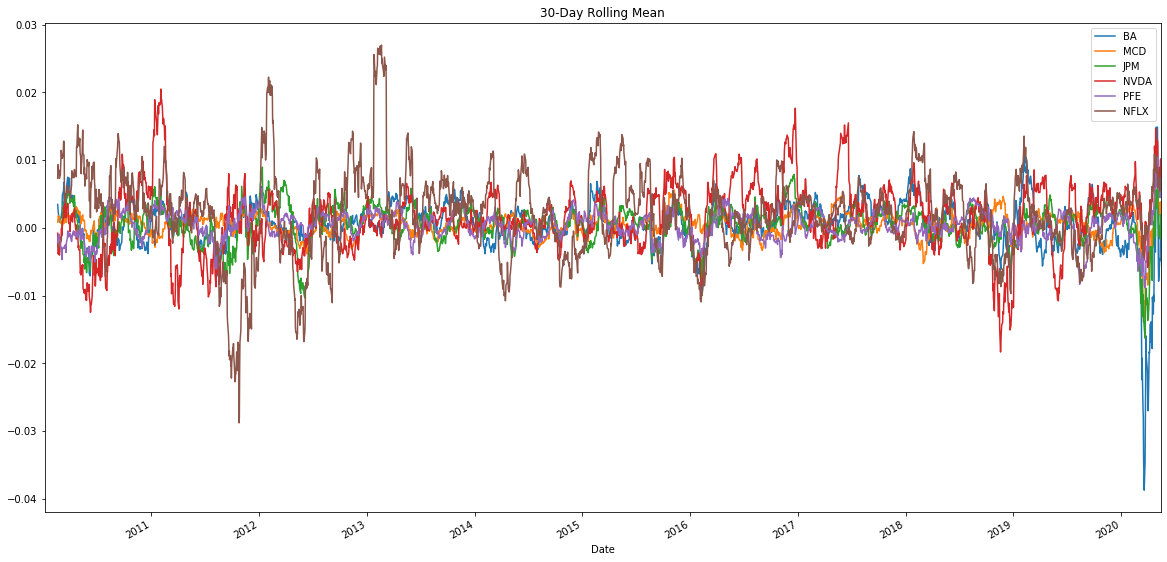

In [121]:
# Rolling 30-day mean of portfolio daily returns
daily_returns.rolling(window=30).mean().plot(title='30-Day Rolling Mean',figsize=(20,10))

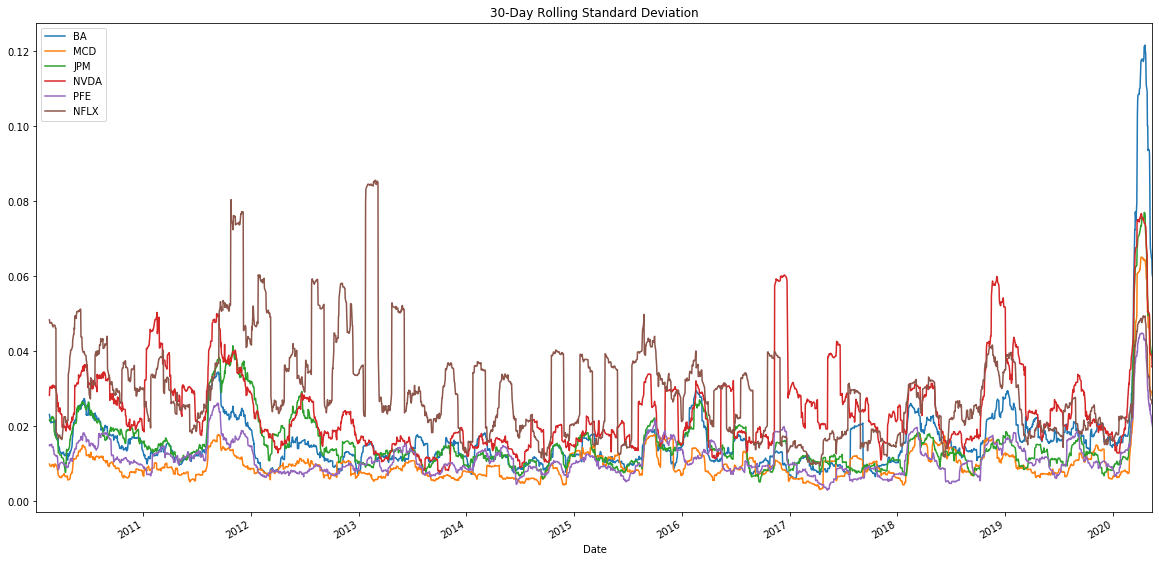

In [122]:
# Rolling 30-Day standard deviation of portfolio returns
daily_returns.rolling(window=30).std().plot(title='30-Day Rolling Standard Deviation',figsize=(20,10))

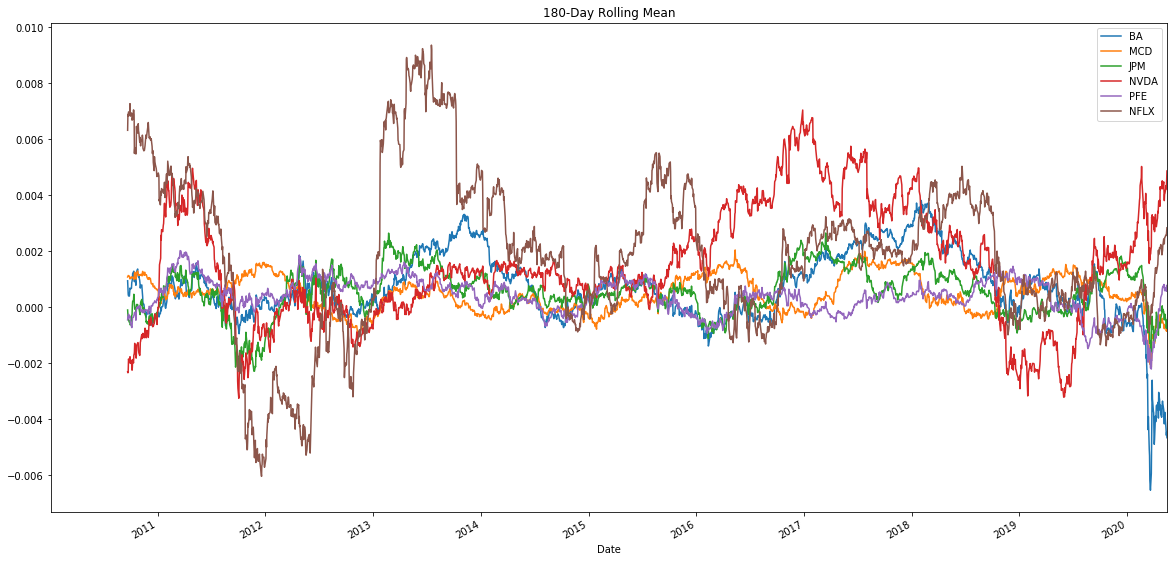

In [123]:
# Rolling 180-day mean of portfolio daily returns
daily_returns.rolling(window=180).mean().plot(title='180-Day Rolling Mean',figsize=(20,10))

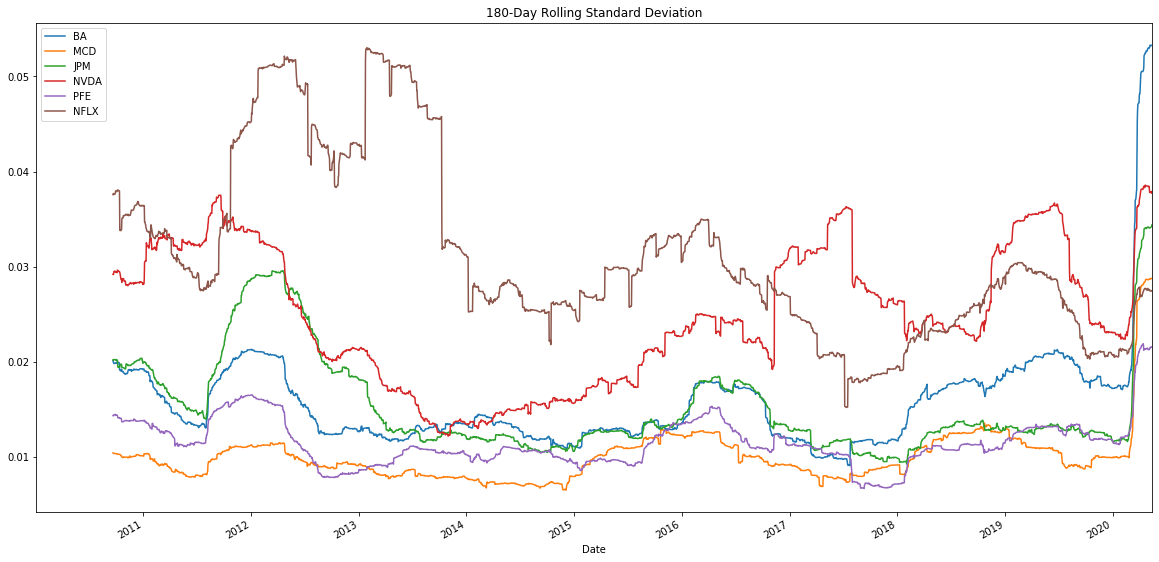

In [124]:
# Rolling 180-Day standard deviation of portfolio returns
daily_returns.rolling(window=180).std().plot(title='180-Day Rolling Standard Deviation',figsize=(20,10))

# Set Portfolio Allocations/Weights and Calculate Daily Returns

In [125]:
# Set weights for corresponding risk profile of stocks
weights = [1/6,1/6,1/6,1/6,1/6,1/6] #equial weights
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head(-10)

Date
2010-01-04         NaN
2010-01-05    0.001361
2010-01-06    0.010115
2010-01-07    0.004532
2010-01-08    0.002201
                ...   
2020-04-27    0.015621
2020-04-28   -0.007367
2020-04-29    0.024274
2020-04-30   -0.000566
2020-05-01   -0.028128
Length: 2600, dtype: float64

In [126]:
# Cumulative Returns
cumport_returns = (1+portfolio_returns).cumprod()
cumport_returns.head(-10)

Date
2010-01-04         NaN
2010-01-05    1.001361
2010-01-06    1.011490
2010-01-07    1.016074
2010-01-08    1.018311
                ...   
2020-04-27    7.871534
2020-04-28    7.813542
2020-04-29    8.003211
2020-04-30    7.998682
2020-05-01    7.773698
Length: 2600, dtype: float64

In [148]:
# Combine portfolio with SP500 
combined_df = pd.concat([portfolio_returns, sp500_returns], axis="columns",join="outer")
combined_df.head()
# Set column names to new  names
combined_df.columns = ['Portfolio','SP500']
combined_df.head(-10)

,Portfolio,SP500
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001361,0.003116
2010-01-06,0.010115,0.000546
2010-01-07,0.004532,0.003992
2010-01-08,0.002201,0.002890
...,...,...
2020-04-27,0.015621,0.014714
2020-04-28,-0.007367,-0.005242
2020-04-29,0.024274,0.026584


In [150]:
# Calculate Beta for portfolio compared to the total market (S&P 500)
portfolio_covariance = combined_df['Portfolio'].cov(combined_df['SP500'])
portfolio_covariance

0.00013007510665880015

In [151]:
portfolio_variance = combined_df['SP500'].var()
portfolio_variance

0.00011972419628183059

In [152]:
portfolio_beta = portfolio_covariance / portfolio_variance
portfolio_beta

1.0864562945371838

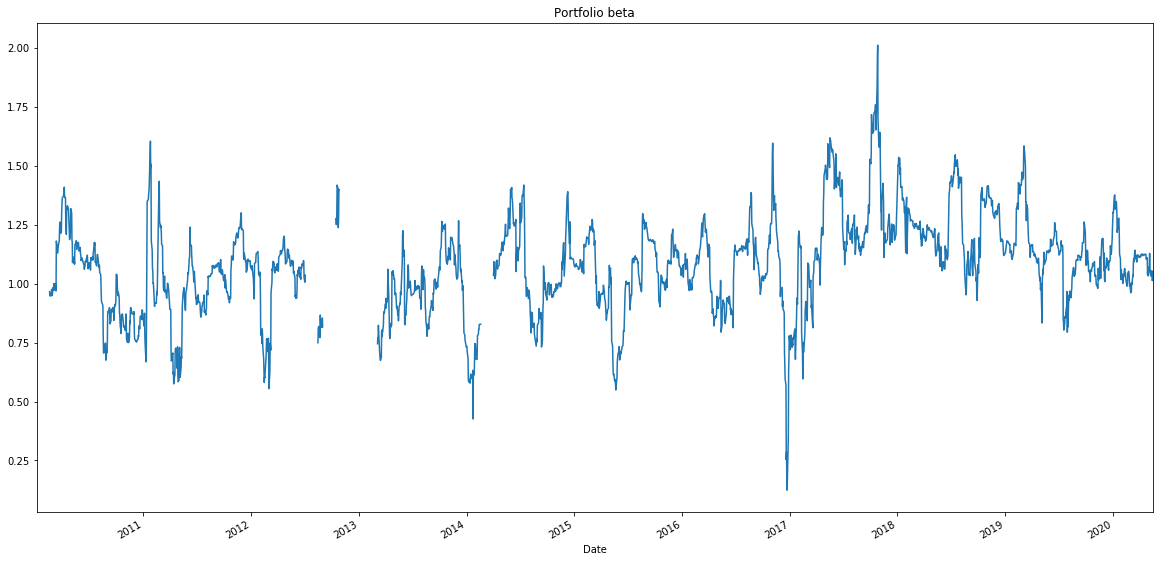

In [154]:
# Rolling Beta
rolling_portfolio_covariance = combined_df['Portfolio'].rolling(window=30).cov(combined_df['SP500'])
rolling_portfolio_variance = combined_df['SP500'].rolling(window=30).var()
rolling_portfolio_beta = rolling_portfolio_covariance / rolling_portfolio_variance
rolling_portfolio_beta.plot(figsize=(20,10), title='Portfolio beta')

# Reward-to-Risk (Sharpe Ratio)

In [156]:
sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratio

BA      0.388869
MCD     0.607176
JPM     0.379081
NVDA    0.872688
PFE     0.433752
NFLX    1.016258
dtype: float64

In [159]:
portfolio_sharpe = (combined_df.mean()*252) / (combined_df.std()*np.sqrt(252))
portfolio_sharpe

Portfolio    1.019745
SP500        0.601552
dtype: float64

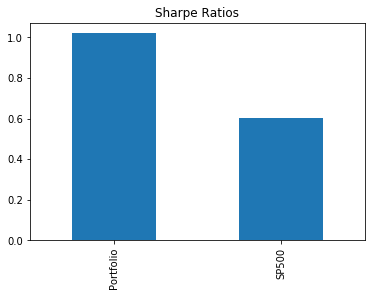

In [160]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe.plot(kind='bar', title='Sharpe Ratios')